In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [61]:
from google.colab import drive

ROOT="/content/drive"
drive.mount(ROOT)

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
import operator

from IPython.core.display import display

In [64]:
rating_file_path = "/content/drive/MyDrive/python_data_analysis/data/ml-1m/ratings.dat"
movie_file_path = "/content/drive/MyDrive/python_data_analysis/data/ml-1m/movies.dat"
user_file_path = "/content/drive/MyDrive/python_data_analysis/data/ml-1m/users.dat"

rating_data = pd.io.parsers.read_csv(rating_file_path, names=['user_id', 'movie_id', 'rating', 'time'], delimiter="::")
movie_data = pd.io.parsers.read_csv(movie_file_path, names=['movie_id', 'title', 'genre'], delimiter="::")
user_data = pd.io.parsers.read_csv(user_file_path, names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter="::")

In [65]:
print(rating_data.shape)
print(movie_data.shape)
print(user_data.shape)

(1000209, 4)
(3883, 3)
(6040, 5)
(1000209, 4)
(3883, 3)
(6040, 5)


In [66]:
print(rating_data.info())
print(movie_data.info())
print(user_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null  

* user_data의 occupation이 왜 int?!

In [67]:
display(rating_data)
display(movie_data)
display(user_data)

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


* rating_data의 행 수가 많았던 이유가 6040명의 user가 추천하는 movie는 여러가지였기 때문이었다. 
* rating_data의 time column 값이 이상(?)하다.
* rating_data의 rating은 1~5.

* movie_data에 null값이 없지만 index번호와 movie_id가 맞지않다. --movie_id에 빠지는 번호가 있다.
* movie_data의 genre column: | 로 구분되는 복수의 값이 들어있기도 하다.

* user_data에서 age가 1인 사람이 있다?! --rating을 신뢰할 수 있을까.

# 탐색적 분석

## movie_data

### 총 영화 수: 3883

In [68]:
len(movie_data['movie_id'].unique())

3883

3883

### 영화가 가장 많이 개봉된 연도 Top 10

In [69]:
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
movie_data

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [70]:
top_10_year = pd.DataFrame(movie_data['year'].value_counts().head(10))
top_10_year.reset_index(inplace=True)
top_10_year.rename(columns={'index': 'year', 'year': 'count'}, inplace=True)
top_10_year

,year,count
0,1996,345
1,1995,342
2,1998,337
3,1997,315
4,1999,283
5,1994,257
6,1993,165
7,2000,156
8,1986,104
9,1992,102


,year,count
0,1996,345
1,1995,342
2,1998,337
3,1997,315
4,1999,283
5,1994,257
6,1993,165
7,2000,156
8,1986,104
9,1992,102


Text(0.5, 1.0, '영화개봉 수 top 10 연도')

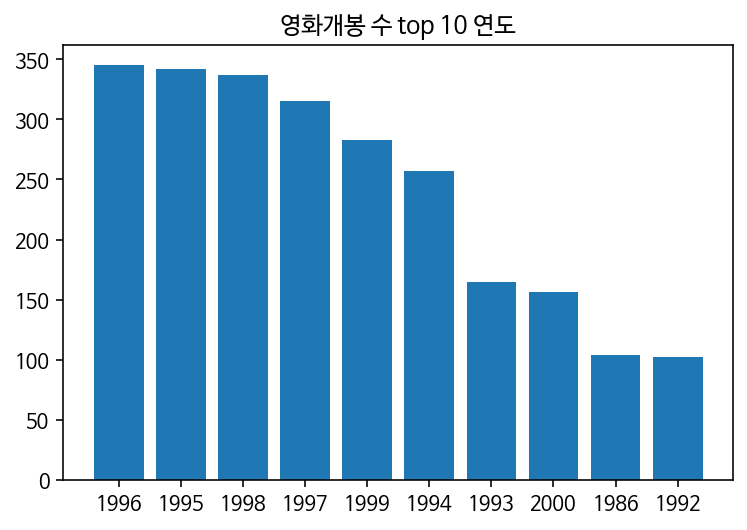

Text(0.5, 1.0, '영화개봉 수 top 10 연도')

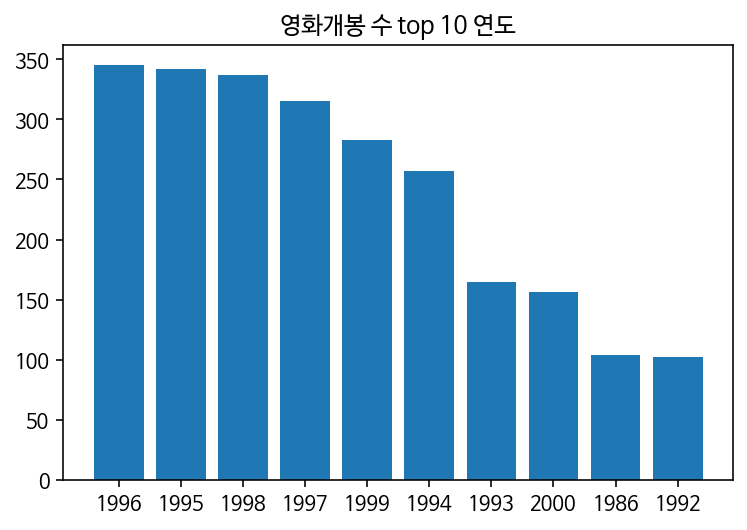

In [71]:
x = top_10_year['year'].tolist()
y = top_10_year['count'].tolist()

plt.bar(x, y)
plt.title("영화개봉 수 top 10 연도")

### 가장 빈번하게 나타난 장르

In [72]:
unique_genre_dict = {}

for index, row in movie_data.iterrows():
    genre_combination = row['genre']
    parsed_genre = genre_combination.split("|")

    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1

unique_genre_dict

{'Action': 503,
 'Adventure': 283,
 'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Crime': 211,
 'Documentary': 127,
 'Drama': 1603,
 'Fantasy': 68,
 'Film-Noir': 44,
 'Horror': 343,
 'Musical': 114,
 'Mystery': 106,
 'Romance': 471,
 'Sci-Fi': 276,
 'Thriller': 492,
 'War': 143,
 'Western': 68}

{'Action': 503,
 'Adventure': 283,
 'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Crime': 211,
 'Documentary': 127,
 'Drama': 1603,
 'Fantasy': 68,
 'Film-Noir': 44,
 'Horror': 343,
 'Musical': 114,
 'Mystery': 106,
 'Romance': 471,
 'Sci-Fi': 276,
 'Thriller': 492,
 'War': 143,
 'Western': 68}

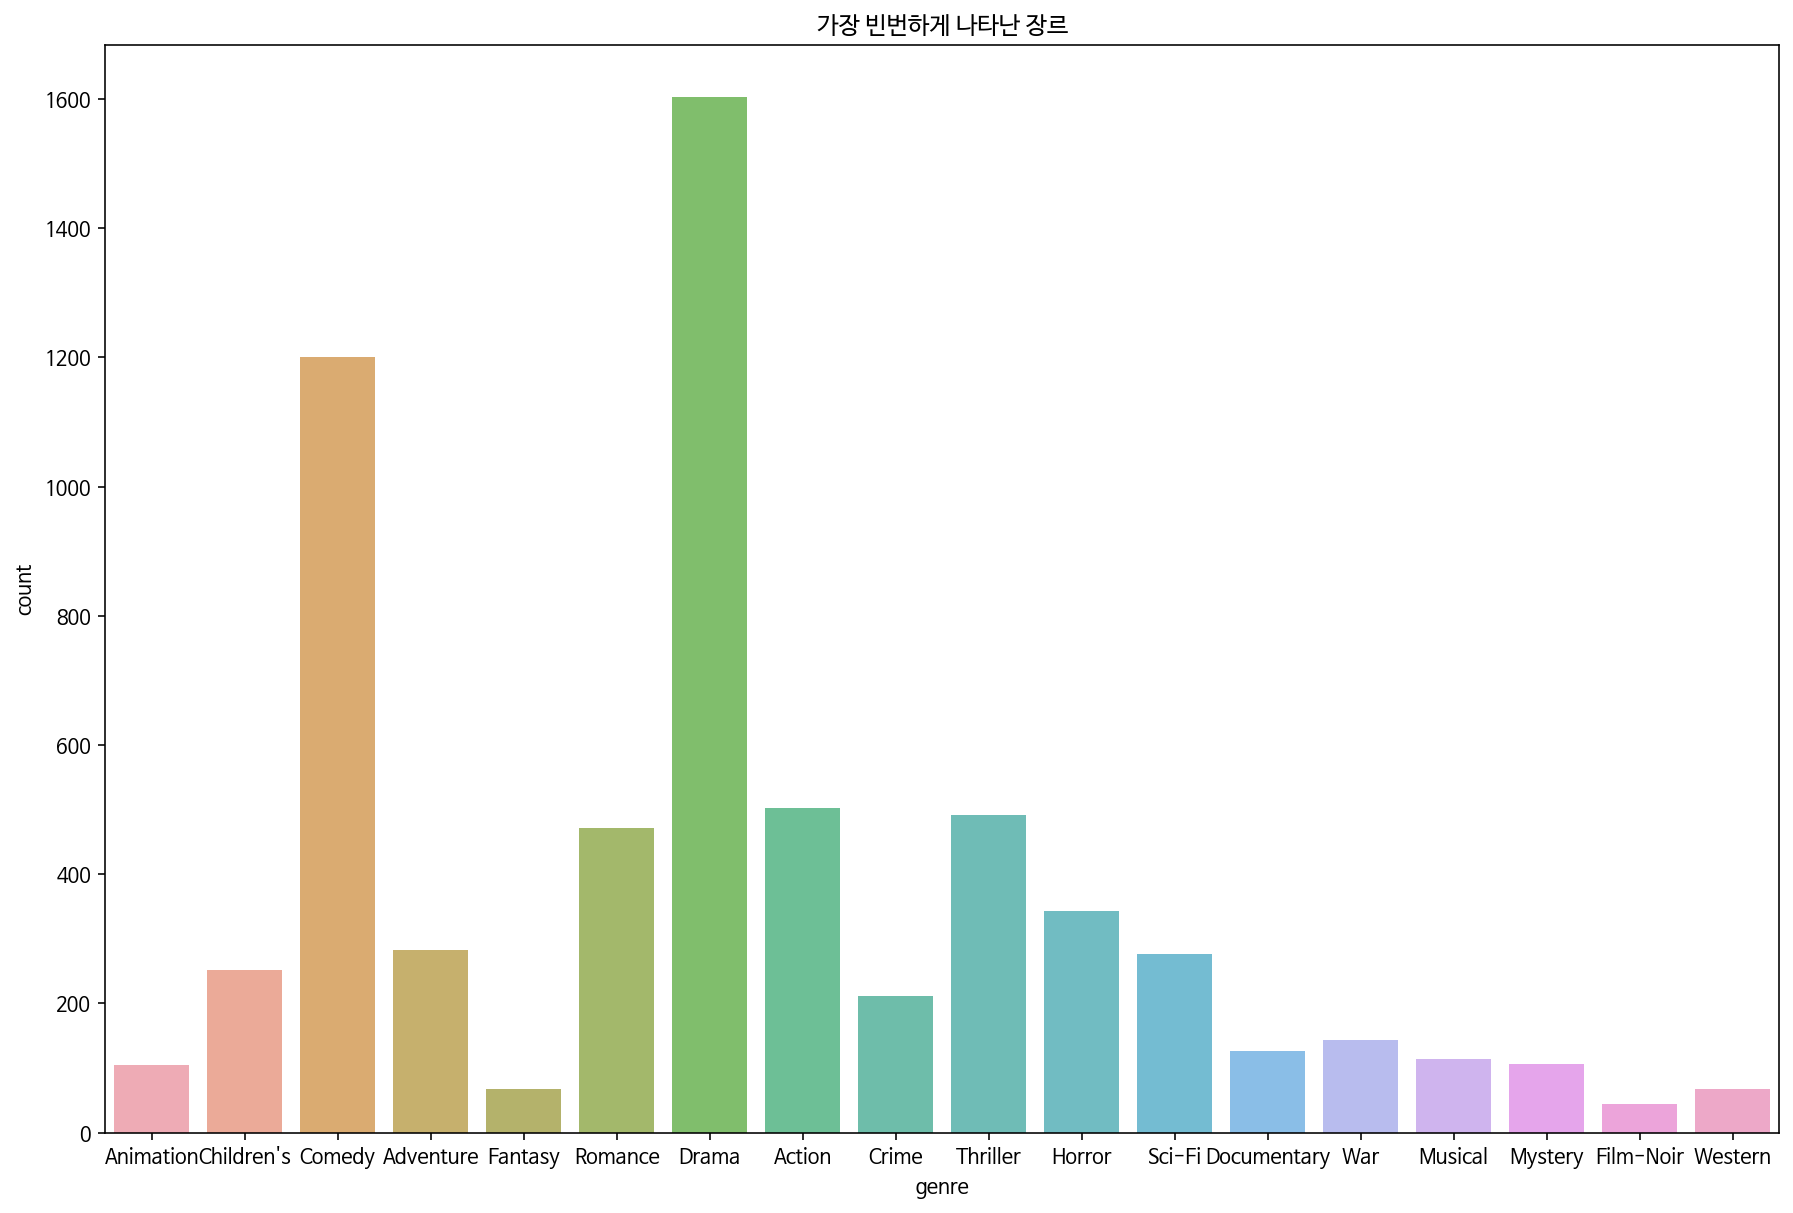

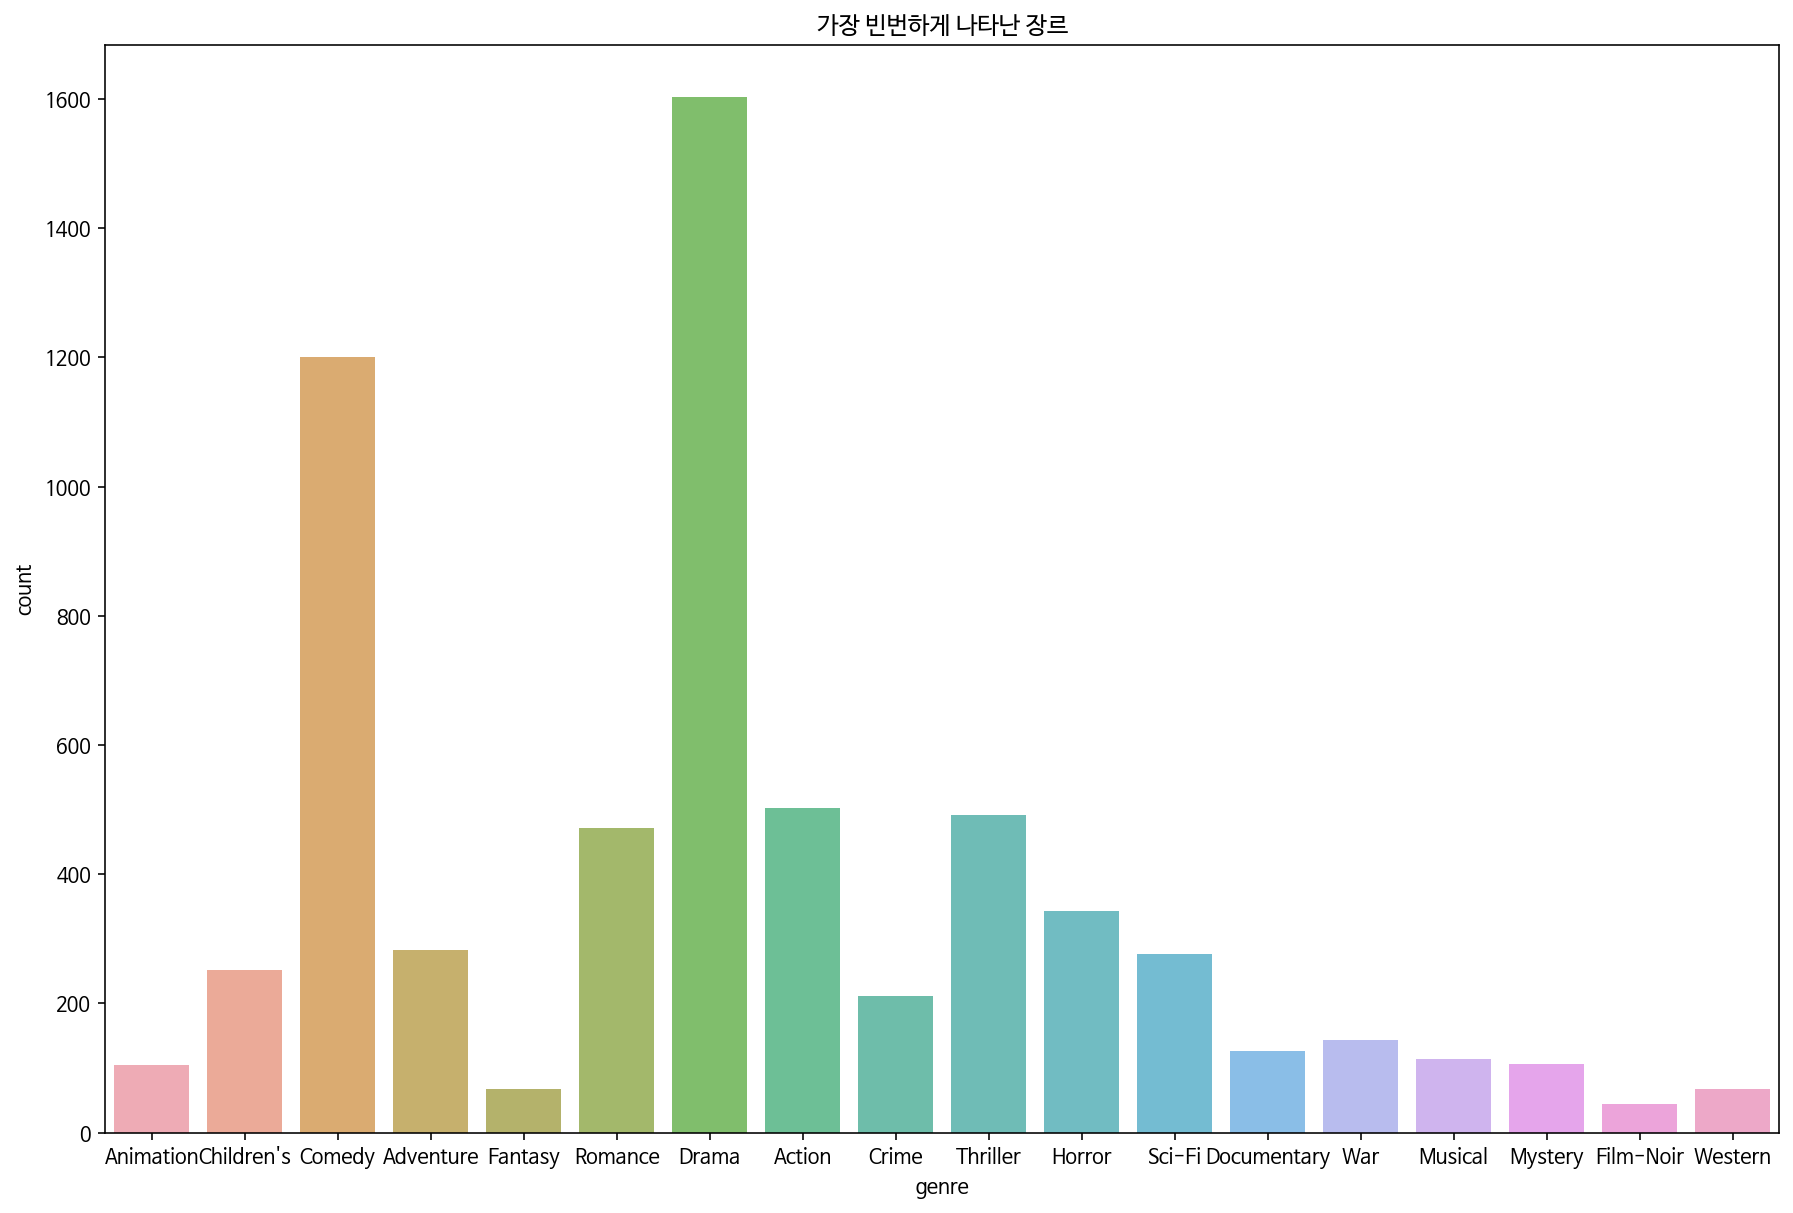

In [73]:
plt.figure(figsize=(15, 10))
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.title("가장 빈번하게 나타난 장르")
plt.xlabel("genre")
plt.ylabel("count")
plt.show()

## user_data

### 총 유저 수: 6040

In [74]:
len(user_data['user_id'].unique())

6040

6040

### 성별 분포

Text(0.5, 1.0, '유저 성별 분포')

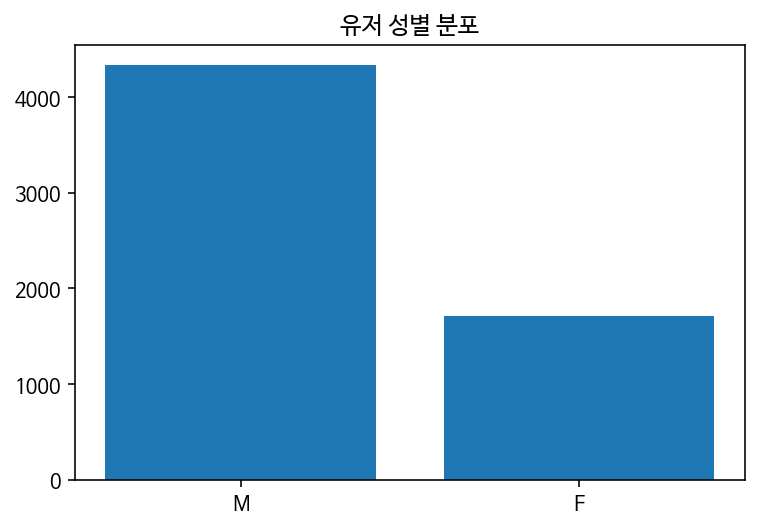

Text(0.5, 1.0, '유저 성별 분포')

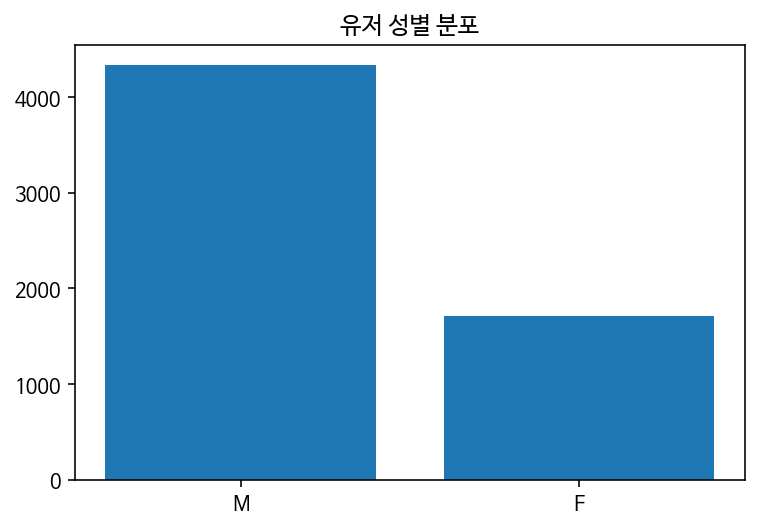

In [75]:
user_gender = user_data['gender'].value_counts()
plt.bar(user_gender.index, user_gender.values)
plt.title("유저 성별 분포")

### 나이 분포

In [76]:
user_data['age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [77]:
user_data.loc[user_data.age == 1, 'age_range'] = 'kids'
user_data.loc[user_data.age == 18, 'age_range'] = 'teens'
user_data.loc[user_data.age == 25, 'age_range'] = '20s'
user_data.loc[user_data.age == 35, 'age_range'] = '30s'
user_data.loc[user_data.age == 45, 'age_range'] = '40s'
user_data.loc[user_data.age == 50, 'age_range'] = '50s'
user_data.loc[user_data.age == 56, 'age_range'] = '50s'

user_data

,user_id,gender,age,occupation,zipcode,age_range
0,1,F,1,10,48067,kids
1,2,M,56,16,70072,50s
2,3,M,25,15,55117,20s
3,4,M,45,7,02460,40s
4,5,M,25,20,55455,20s
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,20s
6036,6037,F,45,1,76006,40s
6037,6038,F,56,1,14706,50s
6038,6039,F,45,0,01060,40s


,user_id,gender,age,occupation,zipcode,age_range
0,1,F,1,10,48067,kids
1,2,M,56,16,70072,50s
2,3,M,25,15,55117,20s
3,4,M,45,7,02460,40s
4,5,M,25,20,55455,20s
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,20s
6036,6037,F,45,1,76006,40s
6037,6038,F,56,1,14706,50s
6038,6039,F,45,0,01060,40s


In [78]:
user_age_range = pd.DataFrame(user_data['age_range'].value_counts())
user_age_range.reset_index(inplace=True)
user_age_range.rename(columns={'index':'range', 'age_range':'counts'}, inplace=True)

In [79]:
user_age_range = pd.DataFrame({'range':['kids', 'teens', '20s', '30s', '40s', '50s'], 
                            'counts':[222, 1103, 2096, 1193, 550, 876]})
user_age_range

,range,counts
0,kids,222
1,teens,1103
2,20s,2096
3,30s,1193
4,40s,550
5,50s,876


,range,counts
0,kids,222
1,teens,1103
2,20s,2096
3,30s,1193
4,40s,550
5,50s,876


Text(0.5, 1.0, '나이 분포')

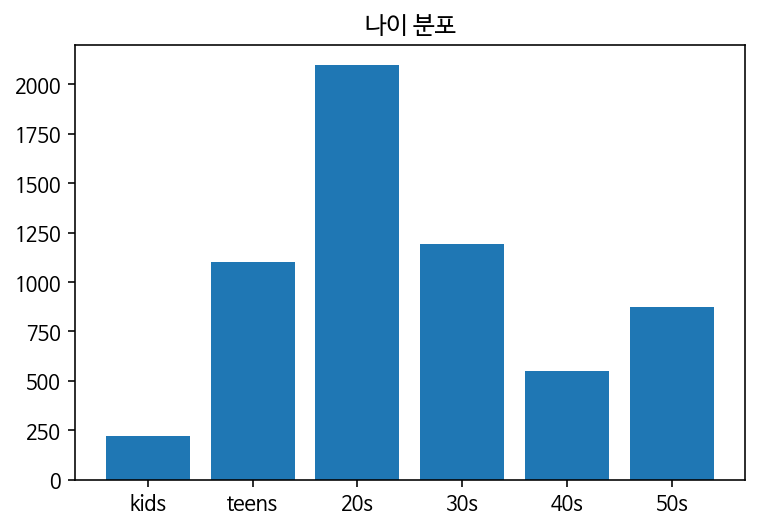

Text(0.5, 1.0, '나이 분포')

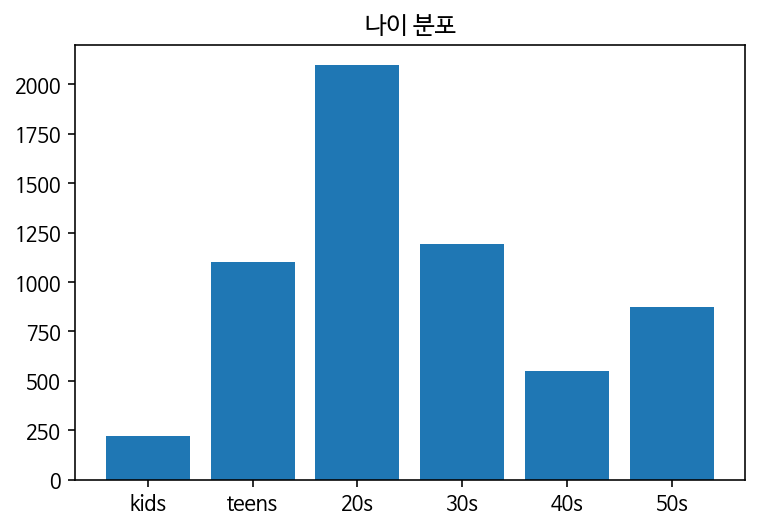

In [80]:
x = user_age_range.range.tolist()
y = user_age_range.counts.tolist()

plt.bar(x, y)
plt.title("나이 분포")

## rating_data

### 각 영화가 평가받은 횟수

In [81]:
rating_count = rating_data['rating'].groupby(rating_data['movie_id']).size()
rating_count

movie_id
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: rating, Length: 3706, dtype: int64

movie_id
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: rating, Length: 3706, dtype: int64

In [82]:
print("user의 rating기록이 있는 영화 수:", len(rating_data['movie_id'].unique()))
print("\n총 영화 수:", len(movie_data['movie_id'].unique()))

user의 rating기록이 있는 영화 수: 3706

총 영화 수: 3883
user의 rating기록이 있는 영화 수: 3706

총 영화 수: 3883


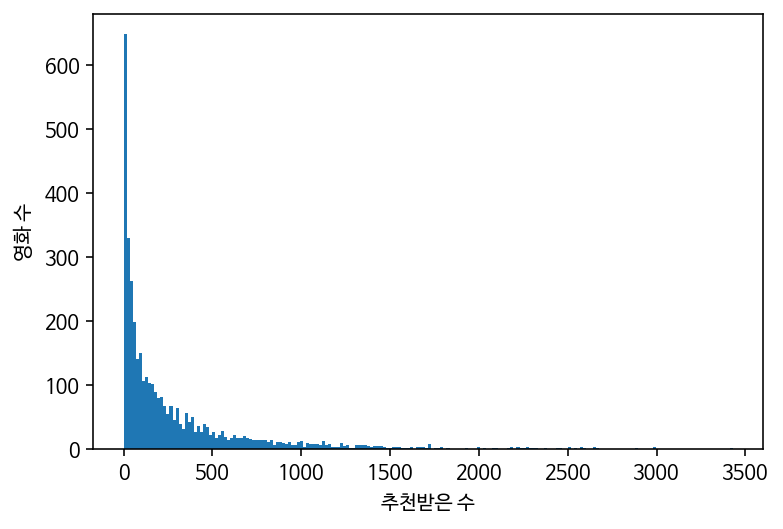

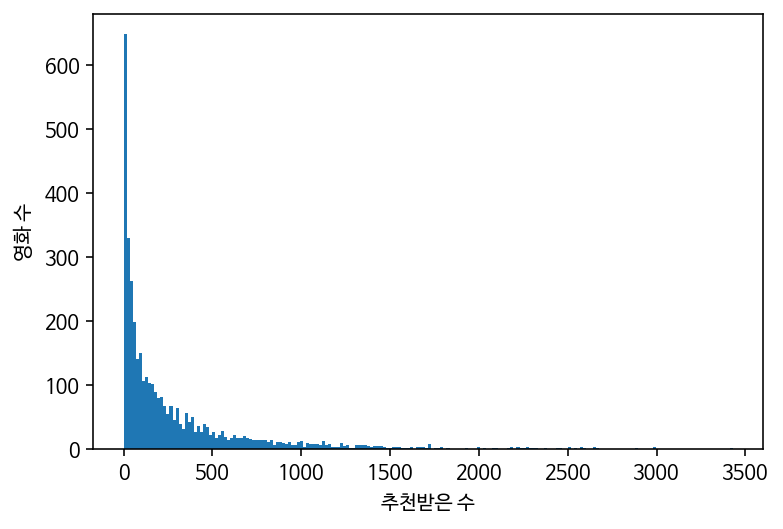

In [83]:
fig1 = plt.hist(rating_count, bins=200)
plt.xlabel("추천받은 수")
plt.ylabel("영화 수")
plt.show()

In [84]:
len(rating_count[rating_count.values < 100])

1687

1687

### 영화의 평균 평점 

In [85]:
rating_data.head(5)

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [86]:
avg_rating = rating_data.groupby('movie_id')['rating'].agg(rated_count='count', rated_mean='mean')
display(avg_rating)

,rated_count,rated_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


,rated_count,rated_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


In [87]:
avg_rating['rated_mean'].describe()

count    3706.000000
mean        3.238892
std         0.672925
min         1.000000
25%         2.822705
50%         3.331546
75%         3.740741
max         5.000000
Name: rated_mean, dtype: float64

count    3706.000000
mean        3.238892
std         0.672925
min         1.000000
25%         2.822705
50%         3.331546
75%         3.740741
max         5.000000
Name: rated_mean, dtype: float64

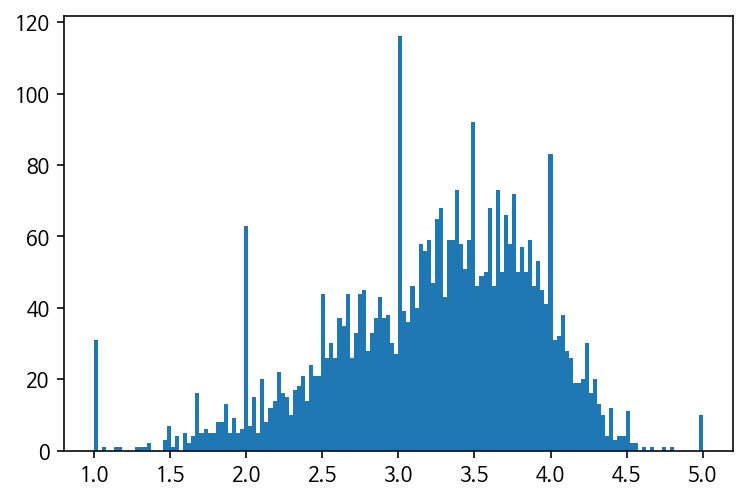

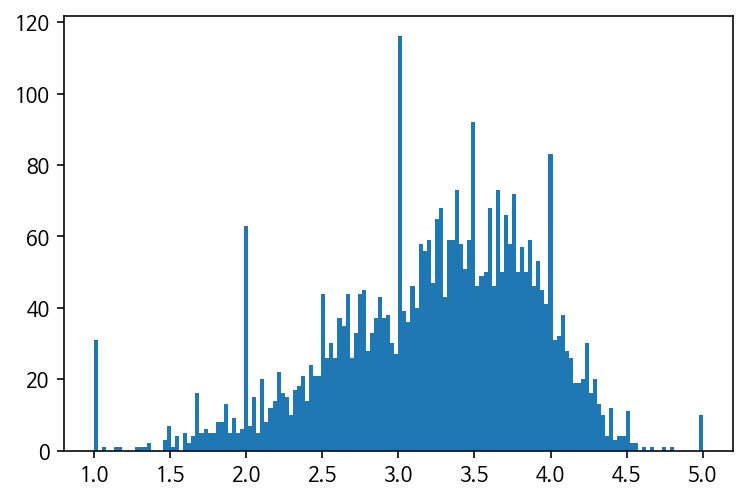

In [88]:
avg_rating['rated_mean'].hist(bins=150, grid=False)

### 100만 이상 평가를 받은 영화 중 평점 높은 영화 TOP 10

In [89]:
merged_data = avg_rating.merge(movie_data, on=['movie_id'], how='left')
merged_data

,movie_id,rated_count,rated_mean,title,genre,year
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...,...,...
3701,3948,862,3.635731,Meet the Parents (2000),Comedy,2000
3702,3949,304,4.115132,Requiem for a Dream (2000),Drama,2000
3703,3950,54,3.666667,Tigerland (2000),Drama,2000
3704,3951,40,3.900000,Two Family House (2000),Drama,2000


,movie_id,rated_count,rated_mean,title,genre,year
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...,...,...
3701,3948,862,3.635731,Meet the Parents (2000),Comedy,2000
3702,3949,304,4.115132,Requiem for a Dream (2000),Drama,2000
3703,3950,54,3.666667,Tigerland (2000),Drama,2000
3704,3951,40,3.900000,Two Family House (2000),Drama,2000


In [90]:
merged_data[merged_data['rated_count']>100][['rated_mean', 'title']].nlargest(10, 'rated_mean')

,rated_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


,rated_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


# 예측

## UIR 데이터 - 행렬 그래프 
* User - 행
* Item - 열
* Rating - 점을 표현하는 색

In [91]:
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(["user_id", "movie_id"]).unstack()
rating_table

rating                           ...                              
movie_id   1    2    3    4    5    6     ... 3947 3948 3949 3950 3951 3952
user_id                                   ...                              
1           5.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2           NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
3           NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
4           NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
5           NaN  NaN  NaN  NaN  NaN  2.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
6036        NaN  NaN  NaN  2.0  NaN  3.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
6037        NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
6038        NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
6039        NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
6040        3.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN

[6040 rows x 3706 columns]

rating                           ...                              
movie_id   1    2    3    4    5    6     ... 3947 3948 3949 3950 3951 3952
user_id                                   ...                              
1           5.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2           NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
3           NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
4           NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
5           NaN  NaN  NaN  NaN  NaN  2.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
6036        NaN  NaN  NaN  2.0  NaN  3.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
6037        NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
6038        NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
6039        NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
6040        3.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN

[6040 rows x 3706 columns]

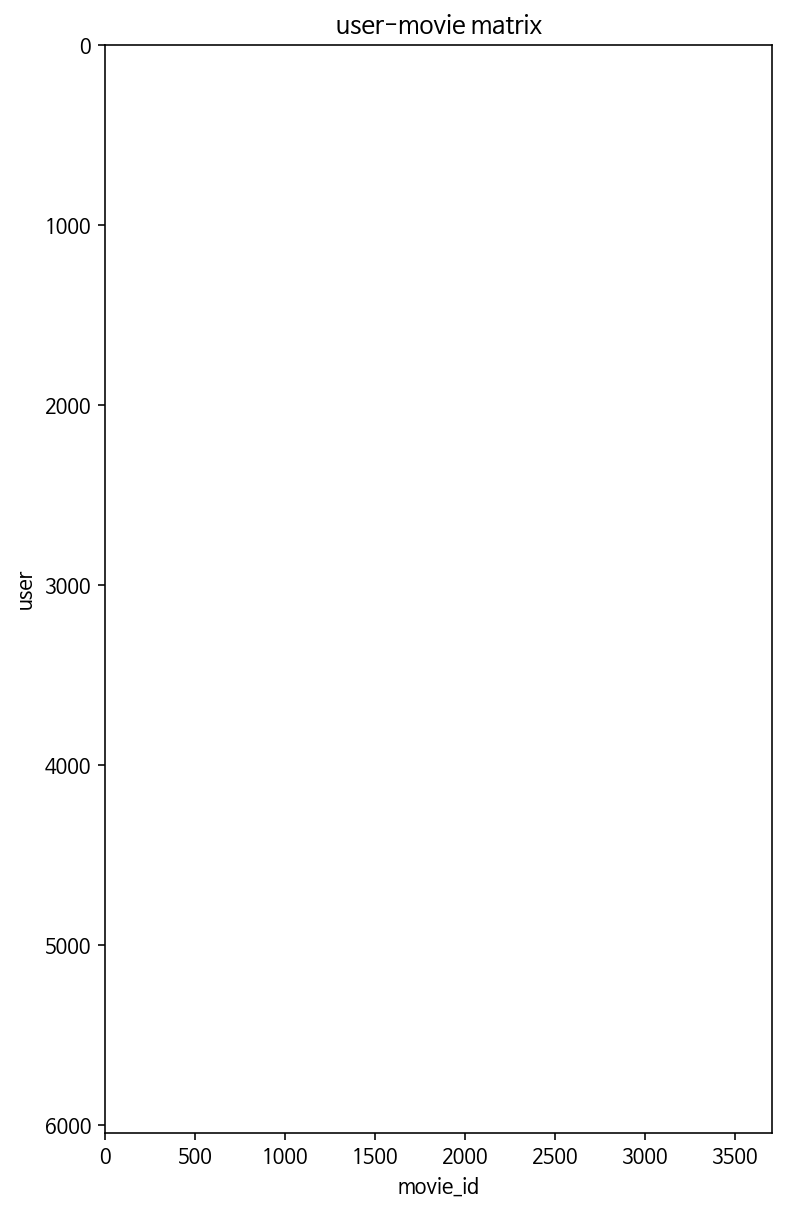

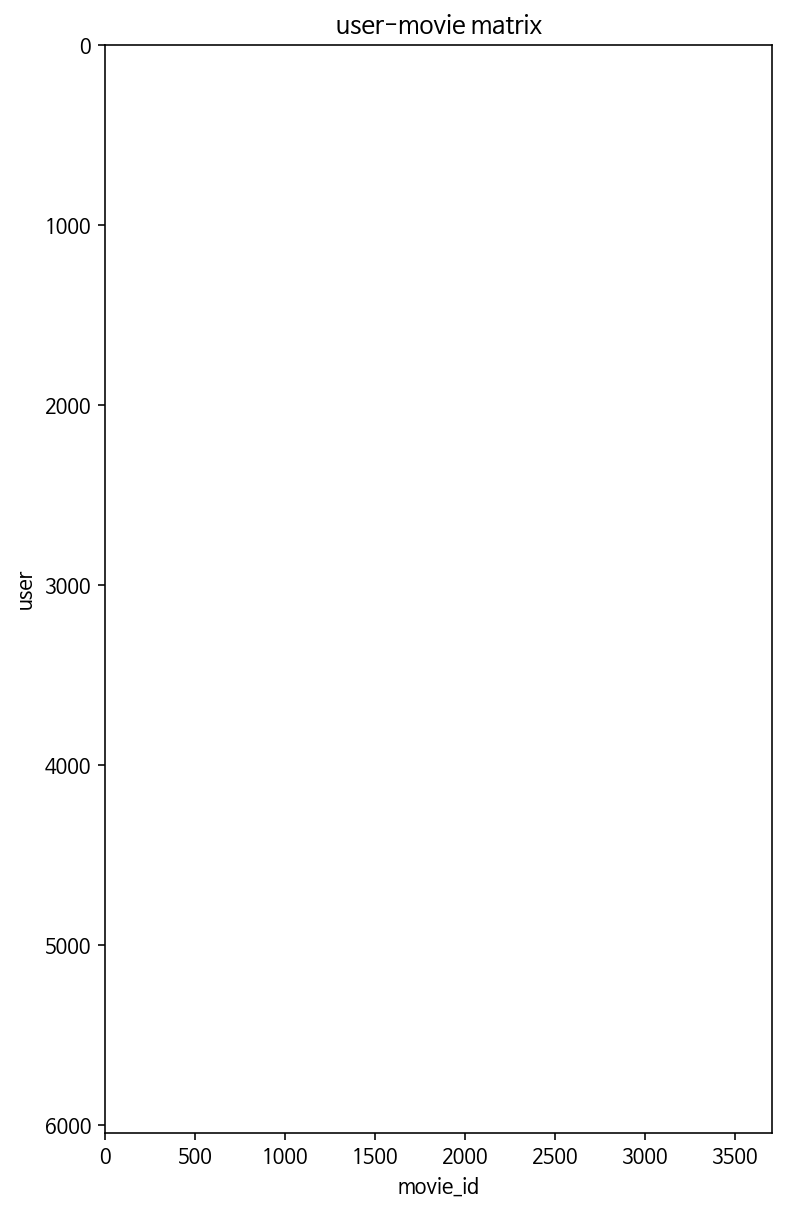

In [92]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel("movie_id")
plt.ylabel("user")
plt.title("user-movie matrix")
plt.show()

행렬그래프 대부분의 공간에 색이 없을 떄(희소행렬일 때):
= Rating 점수가 아직 채워지지 않음 

* 행렬의 빈 공간을 채우는 방법: 행렬 완성(Matrix Completion) 

\\
**<행렬완성>**
* 행렬분해(Matrix Factorization) 이용 
    * 행렬분해: 하나의 행렬을 여러개의 행렬곱으로 나타내는 방법. ex. SVD
* SVD(Singular Value Decomposition): m x n의 행렬 A를 3개의 행렬 U, S, V로 나누는 것.
    * A행렬(20, 10) = U행렬(20, 4) X S행렬(4, 3) X V행렬(3, 10)
    * 반대로 3개의 행렬을 원래 행렬로 근사할 때 사용되기도 함. 
    * 방법: 
        1. 3개로 나눠진 행렬 U, S, V의 값을 임의의 숫자로 초기화
        2. 임의의 값으로 채워진 3개의 행렬을 곱하여 A' 계산
        3. A'와 A를 비교, 최대한 비슷해지도록 학습
    * 필요 라이브러리: surprise

### SVD

In [93]:
!pip install surprise

     |████████████████████████████████| 11.8MB 24.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617567 sha256=b5a172b9edd1c75d6ad0beb99ac2295f79fabc4a0172341d098916557039f864
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [94]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

####[user_id 4] Reader 객체 생성하기
- 평점 범위 1~5
- train, test datset 분리 x

In [95]:
reader = Reader(rating_scale=(1, 5))

# rating data를 surprise 라이브러리의 데이터셋 형태로 변환
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
training_data = data.build_full_trainset()

In [96]:
print(reader)
print(data)
print(training_data)

#### [user_id 4] SVD 모델 학습하기

In [97]:
train_start = time.time()

model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)

model.fit(training_data)

train_end = time.time()

print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 63.08 seconds
training time of model: 64.40 seconds


#### [user_id 4] 예측하기 
user_id가 4인 유저 선정

In [98]:
target_user_id = 4

target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [99]:
# user_id 4가 평가한 영화 목록 추출
target_user_rated_movie_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_rated_movie_dict[movie_id] = row['rating']

print(target_user_rated_movie_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}
{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [100]:
# user_id 4가 아직 보지 않은 영화의 평점 예측
# model에 넣을 test_data: (target_user_id, movie_id, rating) 형태여야 함
test_data = []

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_rated_movie_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))

test_data[:10]

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0)]

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0)]

In [101]:
target_user_predictions = model.test(test_data)

In [102]:
target_user_predictions[:10]

[Prediction(uid=4, iid=1, r_ui=0, est=4.330274611499945, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.2153879399688354, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=2.465847669565432, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=3.220851837910608, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=2.595594197775443, details={'was_impossible': False}),
 Prediction(uid=4, iid=6, r_ui=0, est=4.136138014067857, details={'was_impossible': False}),
 Prediction(uid=4, iid=7, r_ui=0, est=3.178664329010462, details={'was_impossible': False}),
 Prediction(uid=4, iid=8, r_ui=0, est=2.8528035334377595, details={'was_impossible': False}),
 Prediction(uid=4, iid=9, r_ui=0, est=2.4628974231458556, details={'was_impossible': False}),
 Prediction(uid=4, iid=10, r_ui=0, est=3.3144794303250036, details={'was_impossible': False})]

[Prediction(uid=4, iid=1, r_ui=0, est=4.171371240941182, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=2.8480355395238948, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=2.584446601927192, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=2.794028262497641, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=2.5443598292925644, details={'was_impossible': False}),
 Prediction(uid=4, iid=6, r_ui=0, est=4.274192482991043, details={'was_impossible': False}),
 Prediction(uid=4, iid=7, r_ui=0, est=3.1957804567933503, details={'was_impossible': False}),
 Prediction(uid=4, iid=8, r_ui=0, est=2.960440957981689, details={'was_impossible': False}),
 Prediction(uid=4, iid=9, r_ui=0, est=2.477267486506041, details={'was_impossible': False}),
 Prediction(uid=4, iid=10, r_ui=0, est=3.332130255891109, details={'was_impossible': False})]

In [103]:
def get_user_predicted_ratings (predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid: 
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                            user_id = target_user_id,
                                                            user_history = target_user_rated_movie_dict)

In [104]:
# user_id 4가 아직 못 본 영화 중에서 평점을 높게 줄 것 같은 영화 top 10
target_user_predicted_top10 = sorted(target_user_movie_predict_dict.items(),
                                     key=operator.itemgetter(1),
                                     reverse=True)[:10]

target_user_predicted_top10

[(527, 5),
 (615, 5),
 (750, 5),
 (800, 5),
 (858, 5),
 (898, 5),
 (904, 5),
 (912, 5),
 (913, 5),
 (922, 5)]

[(111, 5),
 (326, 5),
 (527, 5),
 (608, 5),
 (750, 5),
 (858, 5),
 (904, 5),
 (908, 5),
 (910, 5),
 (912, 5)]

In [105]:
movie_dict = {}

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title
    
for predicted in target_user_predicted_top10:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ":", predicted_rating)

Schindler's List (1993) : 5
Bread and Chocolate (Pane e cioccolata) (1973) : 5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) : 5
Lone Star (1996) : 5
Godfather, The (1972) : 5
Philadelphia Story, The (1940) : 5
Rear Window (1954) : 5
Casablanca (1942) : 5
Maltese Falcon, The (1941) : 5
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : 5
Taxi Driver (1976) : 5
To Live (Huozhe) (1994) : 5
Schindler's List (1993) : 5
Fargo (1996) : 5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) : 5
Godfather, The (1972) : 5
Rear Window (1954) : 5
North by Northwest (1959) : 5
Some Like It Hot (1959) : 5
Casablanca (1942) : 5


#### [user_id 4] 평가 & 시각화하기
* user_id 4가 실제로 봤던 영화들로 모델 성능 평가해보기

In [106]:
test_data = []

for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    if movie_id in target_user_rated_movie_dict:
        rating = target_user_rated_movie_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))

test_data

[(4, 260, 5),
 (4, 480, 4),
 (4, 1036, 4),
 (4, 1097, 4),
 (4, 1196, 2),
 (4, 1198, 5),
 (4, 1201, 5),
 (4, 1210, 3),
 (4, 1214, 4),
 (4, 1240, 5),
 (4, 1387, 5),
 (4, 1954, 5),
 (4, 2028, 5),
 (4, 2366, 4),
 (4, 2692, 5),
 (4, 2947, 5),
 (4, 2951, 4),
 (4, 3418, 4),
 (4, 3468, 5),
 (4, 3527, 1),
 (4, 3702, 4)]

[(4, 260, 5),
 (4, 480, 4),
 (4, 1036, 4),
 (4, 1097, 4),
 (4, 1196, 2),
 (4, 1198, 5),
 (4, 1201, 5),
 (4, 1210, 3),
 (4, 1214, 4),
 (4, 1240, 5),
 (4, 1387, 5),
 (4, 1954, 5),
 (4, 2028, 5),
 (4, 2366, 4),
 (4, 2692, 5),
 (4, 2947, 5),
 (4, 2951, 4),
 (4, 3418, 4),
 (4, 3468, 5),
 (4, 3527, 1),
 (4, 3702, 4)]

In [107]:
target_user_predictions = model.test(test_data)
target_user_predictions[:10]

[Prediction(uid=4, iid=260, r_ui=5, est=4.351727882031566, details={'was_impossible': False}),
 Prediction(uid=4, iid=480, r_ui=4, est=3.706108861713746, details={'was_impossible': False}),
 Prediction(uid=4, iid=1036, r_ui=4, est=4.054757564031425, details={'was_impossible': False}),
 Prediction(uid=4, iid=1097, r_ui=4, est=4.22509433181696, details={'was_impossible': False}),
 Prediction(uid=4, iid=1196, r_ui=2, est=4.052452095927793, details={'was_impossible': False}),
 Prediction(uid=4, iid=1198, r_ui=5, est=4.51673847019741, details={'was_impossible': False}),
 Prediction(uid=4, iid=1201, r_ui=5, est=4.420828689268751, details={'was_impossible': False}),
 Prediction(uid=4, iid=1210, r_ui=3, est=3.5452816608332594, details={'was_impossible': False}),
 Prediction(uid=4, iid=1214, r_ui=4, est=4.692593967543682, details={'was_impossible': False}),
 Prediction(uid=4, iid=1240, r_ui=5, est=4.390112597409724, details={'was_impossible': False})]

[Prediction(uid=4, iid=260, r_ui=5, est=4.357233132181698, details={'was_impossible': False}),
 Prediction(uid=4, iid=480, r_ui=4, est=3.563238321876447, details={'was_impossible': False}),
 Prediction(uid=4, iid=1036, r_ui=4, est=3.9676056193600453, details={'was_impossible': False}),
 Prediction(uid=4, iid=1097, r_ui=4, est=4.388152001513822, details={'was_impossible': False}),
 Prediction(uid=4, iid=1196, r_ui=2, est=4.063695263446859, details={'was_impossible': False}),
 Prediction(uid=4, iid=1198, r_ui=5, est=4.421216021060268, details={'was_impossible': False}),
 Prediction(uid=4, iid=1201, r_ui=5, est=4.386619797477035, details={'was_impossible': False}),
 Prediction(uid=4, iid=1210, r_ui=3, est=3.606715962835918, details={'was_impossible': False}),
 Prediction(uid=4, iid=1214, r_ui=4, est=4.513325580184794, details={'was_impossible': False}),
 Prediction(uid=4, iid=1240, r_ui=5, est=4.211620465711313, details={'was_impossible': False})]

In [108]:
def get_user_predicted_ratings (predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid: 
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions,
                                                            user_id=target_user_id,
                                                            user_history=target_user_rated_movie_dict)
target_user_movie_predict_dict

{260: 4.351727882031566,
 480: 3.706108861713746,
 1036: 4.054757564031425,
 1097: 4.22509433181696,
 1196: 4.052452095927793,
 1198: 4.51673847019741,
 1201: 4.420828689268751,
 1210: 3.5452816608332594,
 1214: 4.692593967543682,
 1240: 4.390112597409724,
 1387: 4.393564956246109,
 1954: 3.9429536689787192,
 2028: 4.579753373931438,
 2366: 4.193681302882875,
 2692: 4.437946813216725,
 2947: 4.1913774248998426,
 2951: 4.123303022702274,
 3418: 4.273501439194719,
 3468: 4.777640209352258,
 3527: 3.3469264289634038,
 3702: 3.9147382095878394}

{260: 4.357233132181698,
 480: 3.563238321876447,
 1036: 3.9676056193600453,
 1097: 4.388152001513822,
 1196: 4.063695263446859,
 1198: 4.421216021060268,
 1201: 4.386619797477035,
 1210: 3.606715962835918,
 1214: 4.513325580184794,
 1240: 4.211620465711313,
 1387: 4.567559931810498,
 1954: 4.166671433550553,
 2028: 4.534821007202609,
 2366: 4.109033617444831,
 2692: 4.4349488816499845,
 2947: 4.356547218410016,
 2951: 4.151035457021377,
 3418: 4.250803794453567,
 3468: 4.958056969915927,
 3527: 3.210654181942289,
 3702: 3.7524508392242786}

In [109]:
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0

for movie_id, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    predicted_rating = round(predicted_rating, 2)
    origin_rating = target_user_rated_movie_dict[np.int64(movie_id)]
    movie_title = movie_dict[np.int64(movie_id)]
    print("movie", str(idx), ":", movie_title, "-", origin_rating, "/", predicted_rating)
    origin_rating_list.append(origin_rating)
    predicted_rating_list.append(predicted_rating)
    movie_title_list.append(str(idx))

movie 1 : Star Wars: Episode IV - A New Hope (1977) - 5 / 4.35
movie 2 : Jurassic Park (1993) - 4 / 3.71
movie 3 : Die Hard (1988) - 4 / 4.05
movie 4 : E.T. the Extra-Terrestrial (1982) - 4 / 4.23
movie 5 : Star Wars: Episode V - The Empire Strikes Back (1980) - 2 / 4.05
movie 6 : Raiders of the Lost Ark (1981) - 5 / 4.52
movie 7 : Good, The Bad and The Ugly, The (1966) - 5 / 4.42
movie 8 : Star Wars: Episode VI - Return of the Jedi (1983) - 3 / 3.55
movie 9 : Alien (1979) - 4 / 4.69
movie 10 : Terminator, The (1984) - 5 / 4.39
movie 11 : Jaws (1975) - 5 / 4.39
movie 12 : Rocky (1976) - 5 / 3.94
movie 13 : Saving Private Ryan (1998) - 5 / 4.58
movie 14 : King Kong (1933) - 4 / 4.19
movie 15 : Run Lola Run (Lola rennt) (1998) - 5 / 4.44
movie 16 : Goldfinger (1964) - 5 / 4.19
movie 17 : Fistful of Dollars, A (1964) - 4 / 4.12
movie 18 : Thelma & Louise (1991) - 4 / 4.27
movie 19 : Hustler, The (1961) - 5 / 4.78
movie 20 : Predator (1987) - 1 / 3.35
movie 21 : Mad Max (1979) - 4 / 3.91
m

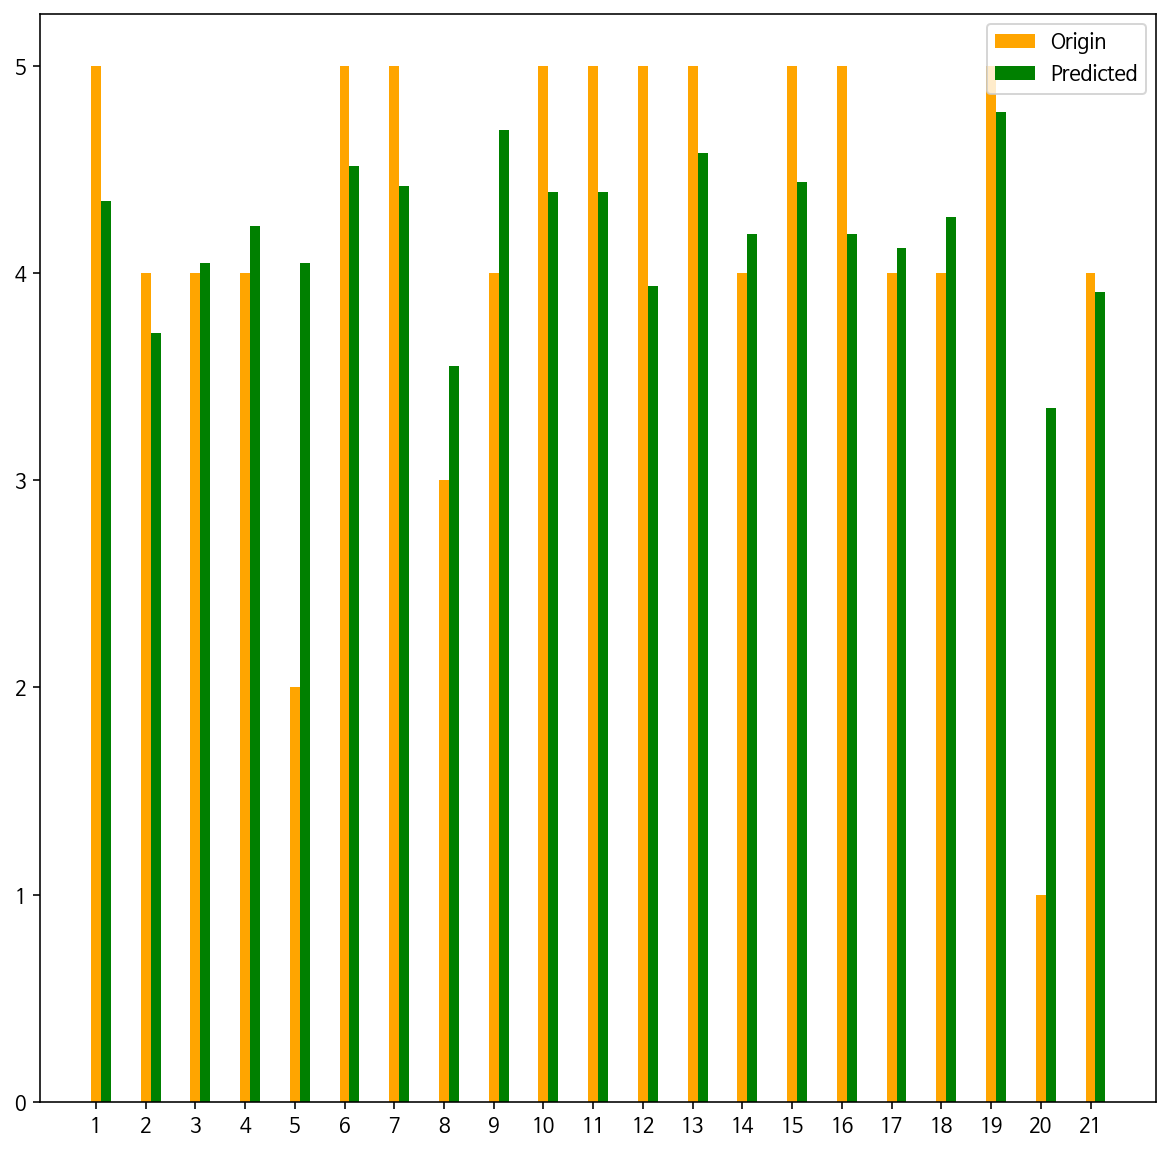

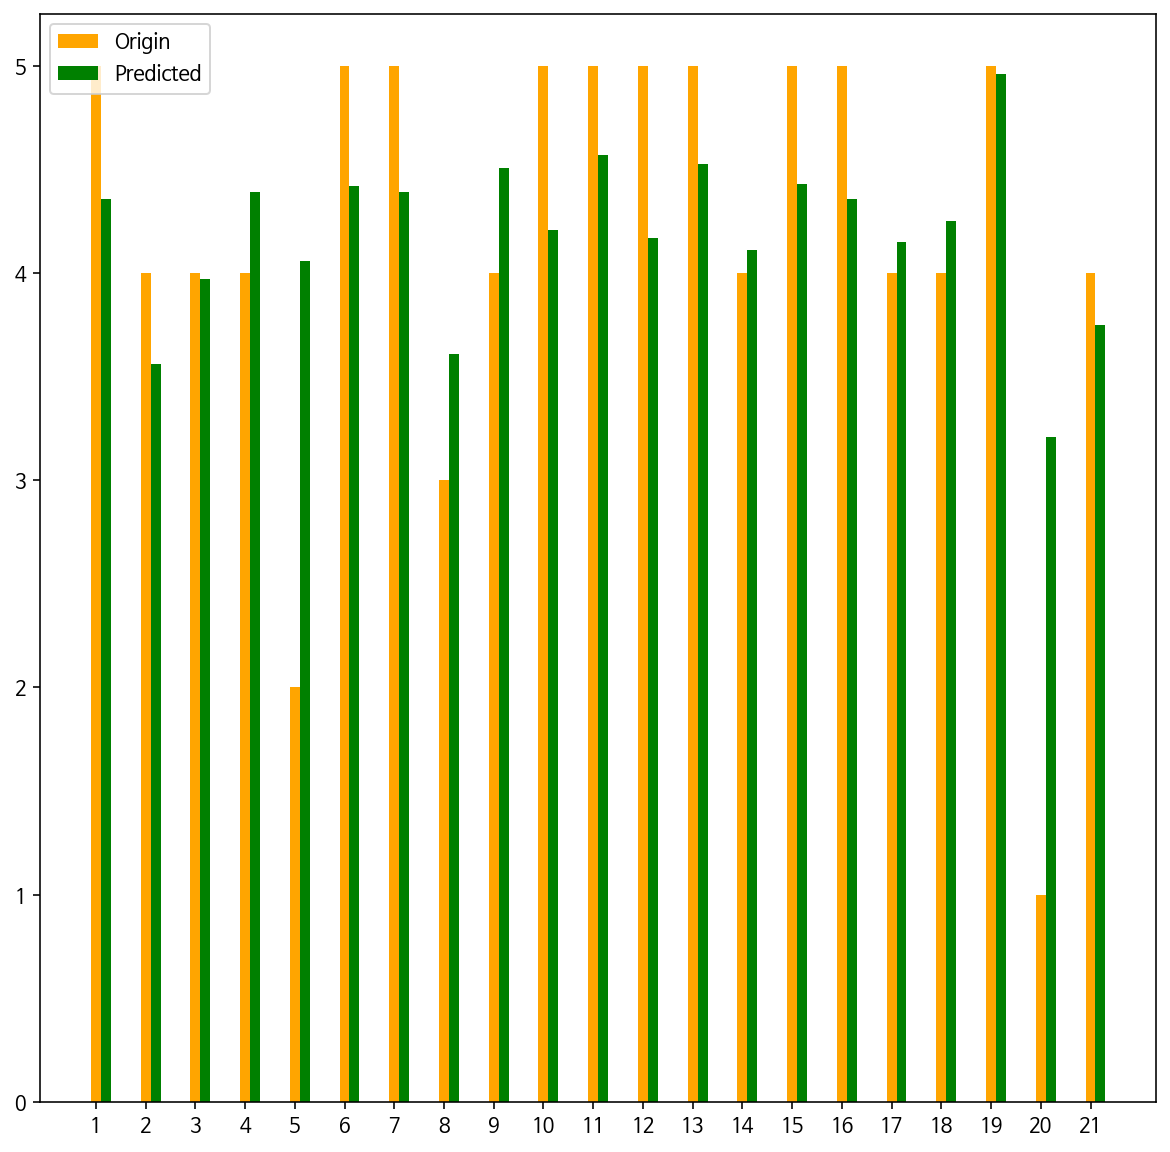

In [110]:
origin = origin_rating_list
predicted = predicted_rating_list
index = np.arange(len(movie_title_list))
bar_width = 0.2

origin_rect = plt.bar(index, origin, bar_width, 
                      color='orange',
                      label='Origin')
predict_rect = plt.bar(index+bar_width, predicted, bar_width,
                       color='green',
                       label='Predicted')
plt.xticks(index, movie_title_list)
plt.legend()
plt.show()

index no.5와 21의 결과를 제외하고는 대체로 맞게 예측했다.

#### 모델 평가하기: RMSE
1. train dataset과 test dataset 분리하기
2. train dataset으로 모델 학습시키기
3. test dataset으로 predict 하기 
4. RMSE 계산하기

##### [general] Reader 객체 생성하기
- train, test datset 분리

In [111]:
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

##### [general] SVD 모델 학습하기

In [112]:
train_start = time.time()

model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)

model.fit(train_data)

train_end = time.time()

print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 70.40 seconds
training time of model: 69.29 seconds


##### [general] 예측하기

In [113]:
predictions = model.test(test_data)

##### [general] 평가하기

In [114]:
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

RMSE of test dataset in SVD model:
RMSE: 0.8562


0.8561799518003753

RMSE of test dataset in SVD model:
RMSE: 0.8620


0.8620115636328246

##### [general] 하이퍼파라미터 수정 & RMSE 변화 시각화

In [115]:
rmse_list_by_factors = []
ttime_list_by_factors = []

for n in range(1, 15):
    train_start = time.time()
    model = SVD(n_factors=n,
                lr_all=0.005,
                reg_all=0.02,
                n_epochs=100)
    model.fit(train_data)
    train_end = time.time()
    print("training time: %.2f seconds" % (train_end - train_start))
    print("n_factors="+str(n))

    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)

    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end-train_start))
    print("----------------------------------------------")

print("searching n_factors is finished")

training time: 60.17 seconds
n_factors=1
RMSE: 0.8813
----------------------------------------------
training time: 60.70 seconds
n_factors=2
RMSE: 0.8707
----------------------------------------------
training time: 62.00 seconds
n_factors=3
RMSE: 0.8640
----------------------------------------------
training time: 63.36 seconds
n_factors=4
RMSE: 0.8620
----------------------------------------------
training time: 64.72 seconds
n_factors=5
RMSE: 0.8605
----------------------------------------------
training time: 65.83 seconds
n_factors=6
RMSE: 0.8583
----------------------------------------------
training time: 67.59 seconds
n_factors=7
RMSE: 0.8579
----------------------------------------------
training time: 68.74 seconds
n_factors=8
RMSE: 0.8563
----------------------------------------------
training time: 70.06 seconds
n_factors=9
RMSE: 0.8567
----------------------------------------------
training time: 71.36 seconds
n_factors=10
RMSE: 0.8613
------------------------------------

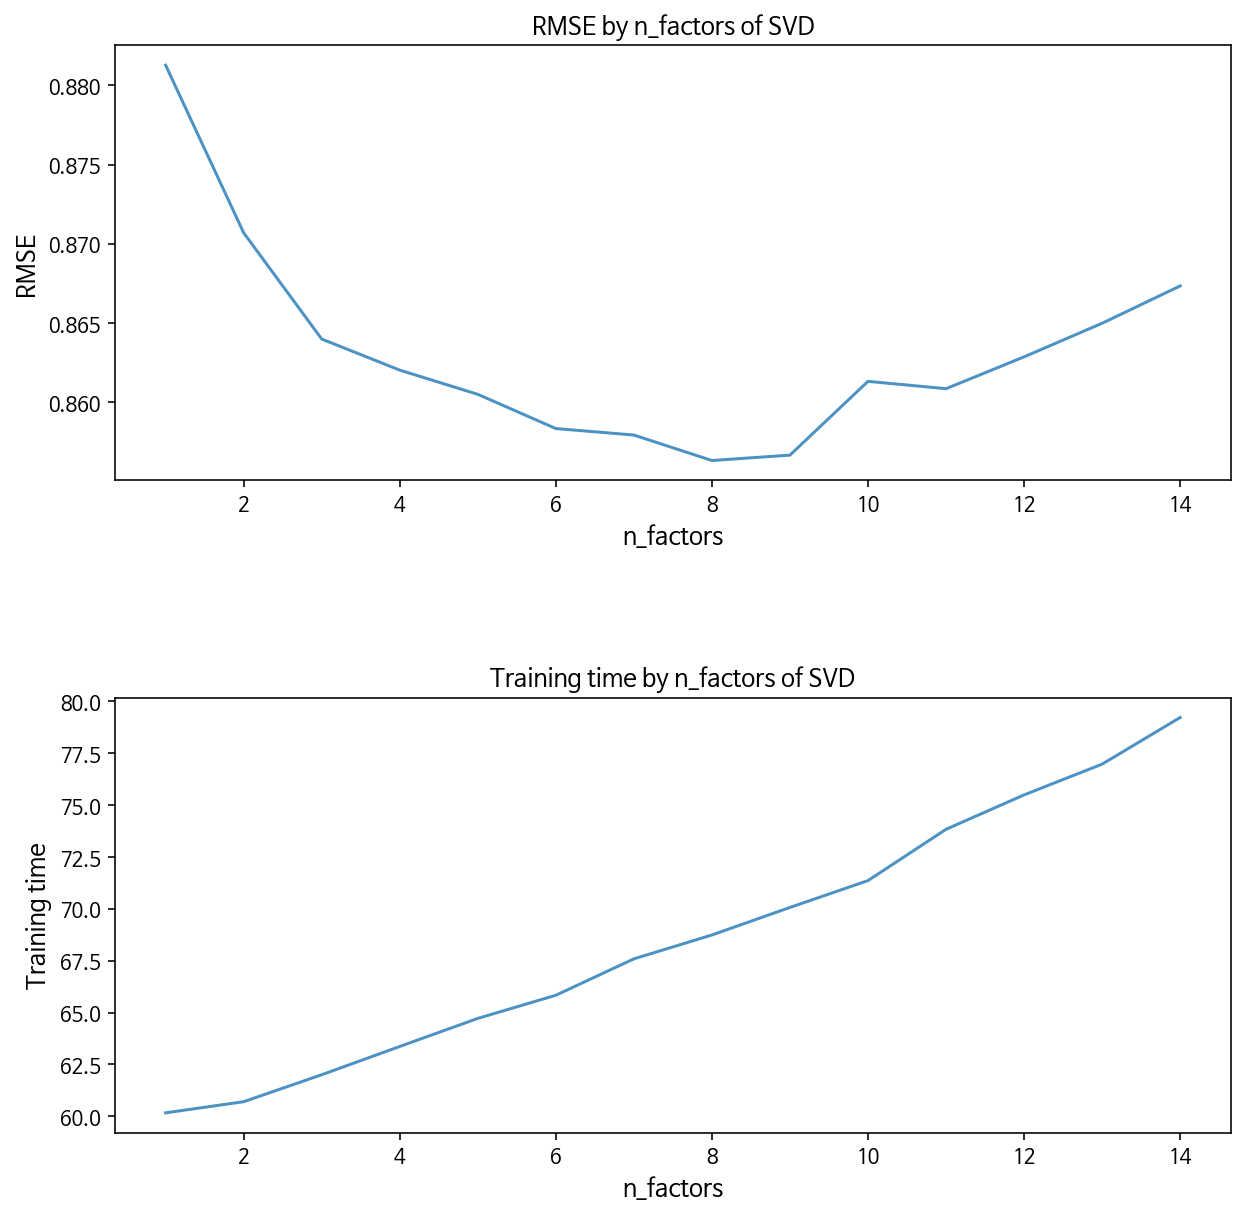

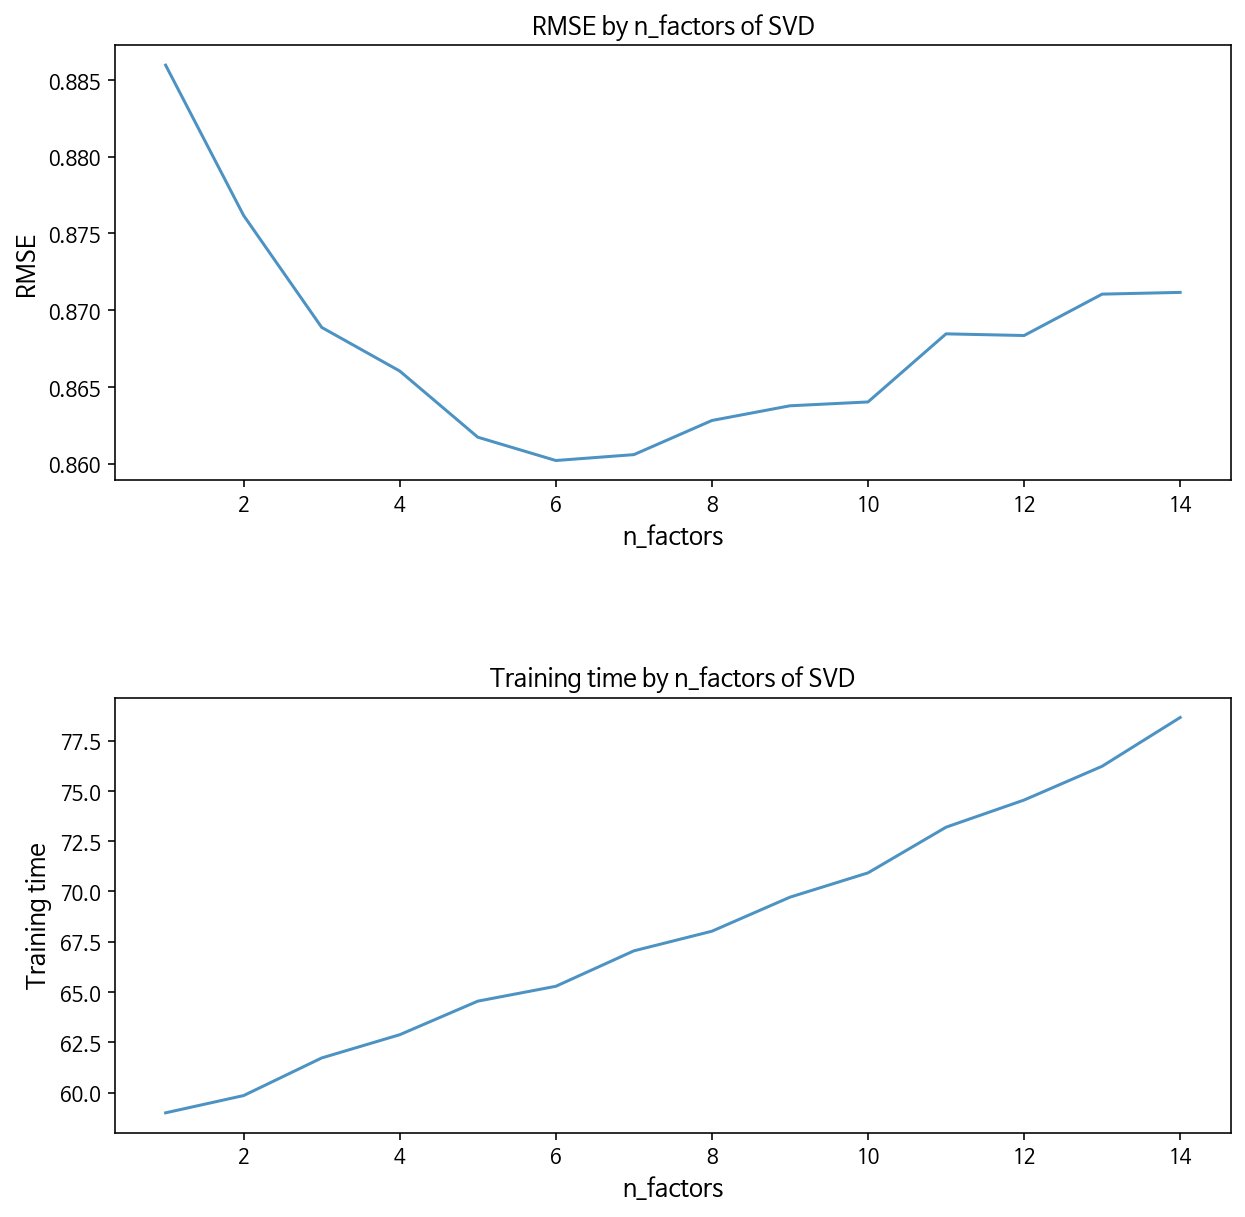

In [116]:
plt.subplot(2, 1, 1)
plt.plot(range(1, 15), rmse_list_by_factors, alpha=0.8)
plt.title("RMSE by n_factors of SVD")
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('n_factors', fontsize=12)

plt.subplot(2, 1, 2)
plt.plot(range(1, 15),ttime_list_by_factors, alpha=0.8)
plt.title("Training time by n_factors of SVD")
plt.ylabel('Training time', fontsize=12)
plt.xlabel('n_factors', fontsize=12)

plt.subplots_adjust(hspace=0.5,
                    wspace=0.3)
plt.show()

n = 8일 때 가장 최적! *--계속 왔다리 갔다리하는데 그래도 되는건가?*

##### [general] 하이퍼파라미터 최적화 & 재학습시키기

In [117]:
train_start = time.time()

model = SVD(n_factors=6,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)

model.fit(train_data)

train_end = time.time()

print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 65.35 seconds
training time of model: 65.15 seconds


In [118]:
# 예측하기
predictions = model.test(test_data)

In [119]:
# 평가하기
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

RMSE of test dataset in SVD model:
RMSE: 0.8575


0.857538364211612

RMSE of test dataset in SVD model:
RMSE: 0.8604


0.8604308438208492